# Data Preprocessing

This notebook preprocesses the metadata (`greeks.csv`)file from the Kaggle competition by changing a variable into epoch time, does mean imputing on the dataset (`train.csv`) and an 80:20 rain test split so that all models will use the same data. 

## Load Libraries
------

In [1]:
# improve figure resolution
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os


pd.set_option('display.max_columns', None) #show all columns
pd.set_option('display.max_rows', None) #show all rows



In [2]:
os.chdir('/Users/ecompu/Library/CloudStorage/OneDrive-Personal/Berkeley/W207_Machine_Learning/mids-207-final-project-summer23-Burzon-Brown-Caldera-Gomez/icr-identify-age-related-conditions/')

#data
dataset_df = pd.read_csv('train.csv')

#metadata
greeks_df = pd.read_csv('greeks.csv')
greeks_df.head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


### 1. Change epsilon into epoch time

In [3]:
# Convert to datetime
greeks_df['Epsilon'] = pd.to_datetime(greeks_df['Epsilon'], format='%m/%d/%Y', errors='coerce')

# Convert to epoch time
greeks_df['EpochTime'] = greeks_df['Epsilon'].apply(lambda x: x.timestamp() if pd.notnull(x) else pd.NaT)
print(greeks_df['EpochTime'].head(10))

0    1552953600.0
1             NaT
2             NaT
3             NaT
4    1585094400.0
5    1569888000.0
6    1559088000.0
7    1556064000.0
8    1550448000.0
9    1592524800.0
Name: EpochTime, dtype: object


<Axes: xlabel='Epsilon', ylabel='Count'>

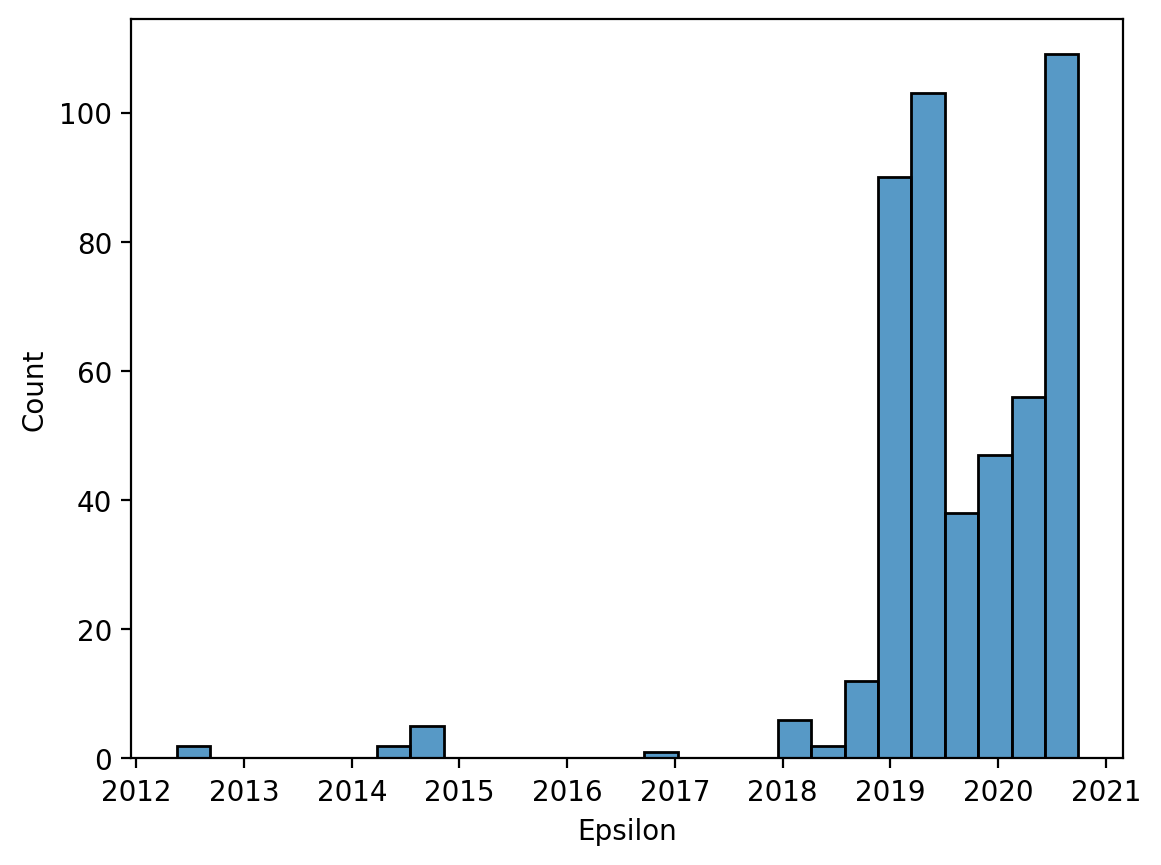

In [4]:
# Plot Epsilon to look at the distribution
sns.histplot(data=greeks_df, x="Epsilon")

### 2. Change EJ into numerical with one-hot encoding

In [5]:
ej_dummy = pd.get_dummies(
    dataset_df['EJ'],prefix='EJ', dtype=int
)

with_dummies_df = pd.concat(
    [dataset_df,ej_dummy],
    axis=1
)

all_vars = with_dummies_df.drop(['EJ'], axis=1)
all_vars.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class', 'EJ_A',
       'EJ_B'],
      dtype='object')

### 3. Train-test split

In [6]:
# merge greeks and training to plot epochs 
all_vars = all_vars.merge(greeks_df, left_on='Id', right_on='Id')
all_vars.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class', 'EJ_A', 'EJ_B',
       'Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon', 'EpochTime'],
      dtype='object')

In [7]:
columns = [i for i in all_vars.columns if i not in ['Class']] 


# Sort the DataFrame by 'Epsilon' 
all_vars_sorted = all_vars.sort_values('Epsilon')

# Calculate the index to split the data
split_index = int(len(all_vars_sorted) * 0.8)

# Split the data into train and test sets
train_df, test_df = np.split(all_vars_sorted, [split_index])

# save x_train, y_train, X_test and Y_test as Numpy arrays
y_train = train_df['Class'].values
y_test = test_df['Class'].values

X_train = train_df[columns].values
X_test = test_df[columns].values




# # Check the shape of the train and test sets
print('Shape X_train: ', X_train.shape, '\nShape X_test: ', X_test.shape,
      '\nShape y_train: ', y_train.shape, '\nShape y_test:', y_test.shape)

Shape X_train:  (493, 64) 
Shape X_test:  (124, 64) 
Shape y_train:  (493,) 
Shape y_test: (124,)


### 4. Mean imputing on train_df

In [8]:
train_df.dtypes
train_df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class,EJ_A,EJ_B,Alpha,Beta,Gamma,Delta,Epsilon,EpochTime
280,6ed97ed5defe,0.341840,1524.80570,85.200147,31.044328,8.138688,5.457144,0.025578,16.164630,10.464692,9629.39619,21.8922,298.595160,55.616750,443.107397,257.432377,12.499760,0.680070,60.728480,11.966335,0.023084,1.050225,0.678750,47.472018,1.015128,38.553520,42.13680,194.270740,0.238680,0.360756,122.712645,81.80656,26.845616,3.510573,1.74307,18.426184,16.037292,3.059529,2193.021675,0.827424,36.629307,78.526968,3.828384,36.037008,6.079488,5648.636160,13.021706,4.031045,1.18030,0.284466,15.190166,72.611063,1800.504612,32.953176,159.638896,0.158711,0,0,1,A,C,M,D,2012-05-17,1337212800.0
491,c60e0e7b6ca1,0.290564,4875.39734,85.200147,20.762288,8.138688,4.686411,0.025578,9.005558,10.647420,3906.20713,21.8922,183.654675,45.834975,397.056360,257.432377,12.499760,0.445062,52.301016,6.370895,0.024676,1.050225,0.598500,34.462021,1.048230,35.878712,61.33504,247.424215,0.238680,0.363489,60.232470,96.04448,17.899352,0.993168,1.74307,18.947256,4.926396,3.228831,1269.244575,0.340704,31.424679,78.526968,3.828384,37.088016,6.845361,5340.295306,10.154946,5.863005,1.17798,0.067730,21.850398,72.611063,3580.530156,19.587344,39.259008,0.231000,0,0,1,A,C,M,D,2012-08-01,1343779200.0
190,48485c8c1ef7,0.585401,2668.16616,85.200147,21.350718,8.138688,5.528016,0.077343,7.171676,1.229900,5690.45403,23.6577,239.194053,11.946530,806.809571,1513.799323,14.916993,0.352781,74.800680,7.775837,0.036218,1.050225,0.568800,47.472018,1.274427,36.462728,43.90220,341.499435,0.238680,0.371688,138.073845,89.86256,27.644024,8.283297,1.74307,39.453236,12.524496,1.052091,1395.745475,0.717912,52.693641,183.795001,3.828384,34.643280,7.741848,3768.452400,10.033660,9.087927,1.32298,0.413153,17.078472,72.611063,4165.609518,34.463902,87.476292,0.058361,0,0,1,A,C,M,D,2014-07-09,1404864000.0
377,913b30965ae1,0.337567,2191.31242,85.200147,15.887610,8.138688,4.092858,0.051156,8.072862,10.499832,4329.66115,23.3046,179.644581,121.877530,471.688922,257.432377,26.047294,0.564402,94.739600,0.562585,0.026666,1.050225,0.908625,24.667038,1.759923,39.179856,56.77604,415.927605,1.251666,0.390819,141.210090,122.13532,25.357984,0.441408,1.74307,18.875384,12.884964,2.825731,1786.593250,0.073008,22.091784,78.526968,55.400160,41.726160,2.707272,7032.992196,9.697367,7.213920,1.08286,0.731484,13.608826,72.611063,2027.598318,33.302950,25.964340,0.111375,0,0,1,A,C,M,D,2014-07-16,1405468800.0
571,e9d084428900,0.290564,6640.63246,157.214868,107.589780,8.138688,4.146012,0.025578,10.681890,11.139380,6021.23204,22.5984,240.147828,13.092730,779.988305,257.432377,12.499760,0.734669,94.485904,0.510888,0.032238,1.050225,0.399525,29.465150,1.268910,36.685920,61.08284,201.477615,0.238680,0.407217,122.712645,107.34620,23.979536,0.813846,1.74307,38.074192,4.926396,1.100463,2374.832075,0.097344,51.054003,78.526968,3.828384,45.644592,2.291682,3858.269428,8.991703,6.218792,1.24584,0.142233,11.804238,72.611063,3012.793704,26.910272,93.052388,0.080542,0,0,1,A,C,M,D,2014-07-24,1406160000.0


In [9]:
# Find which columns have missing values 
sum_null = train_df.isnull().sum()
sum_null[sum_null!=0]

BQ           37
CB            1
CC            2
EL           43
FC            1
FS            1
Epsilon      20
EpochTime    20
dtype: int64

In [10]:
# Identify continuous variables (assuming they are numeric)
continuous_vars = train_df.select_dtypes(include='number').columns

# Perform mean imputation for continuous variables
train_df[continuous_vars] = train_df[continuous_vars].fillna(train_df[continuous_vars].mean())

train_df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class,EJ_A,EJ_B,Alpha,Beta,Gamma,Delta,Epsilon,EpochTime
280,6ed97ed5defe,0.341840,1524.80570,85.200147,31.044328,8.138688,5.457144,0.025578,16.164630,10.464692,9629.39619,21.8922,298.595160,55.616750,443.107397,257.432377,12.499760,0.680070,60.728480,11.966335,0.023084,1.050225,0.678750,47.472018,1.015128,38.553520,42.13680,194.270740,0.238680,0.360756,122.712645,81.80656,26.845616,3.510573,1.74307,18.426184,16.037292,3.059529,2193.021675,0.827424,36.629307,78.526968,3.828384,36.037008,6.079488,5648.636160,13.021706,4.031045,1.18030,0.284466,15.190166,72.611063,1800.504612,32.953176,159.638896,0.158711,0,0,1,A,C,M,D,2012-05-17,1337212800.0
491,c60e0e7b6ca1,0.290564,4875.39734,85.200147,20.762288,8.138688,4.686411,0.025578,9.005558,10.647420,3906.20713,21.8922,183.654675,45.834975,397.056360,257.432377,12.499760,0.445062,52.301016,6.370895,0.024676,1.050225,0.598500,34.462021,1.048230,35.878712,61.33504,247.424215,0.238680,0.363489,60.232470,96.04448,17.899352,0.993168,1.74307,18.947256,4.926396,3.228831,1269.244575,0.340704,31.424679,78.526968,3.828384,37.088016,6.845361,5340.295306,10.154946,5.863005,1.17798,0.067730,21.850398,72.611063,3580.530156,19.587344,39.259008,0.231000,0,0,1,A,C,M,D,2012-08-01,1343779200.0
190,48485c8c1ef7,0.585401,2668.16616,85.200147,21.350718,8.138688,5.528016,0.077343,7.171676,1.229900,5690.45403,23.6577,239.194053,11.946530,806.809571,1513.799323,14.916993,0.352781,74.800680,7.775837,0.036218,1.050225,0.568800,47.472018,1.274427,36.462728,43.90220,341.499435,0.238680,0.371688,138.073845,89.86256,27.644024,8.283297,1.74307,39.453236,12.524496,1.052091,1395.745475,0.717912,52.693641,183.795001,3.828384,34.643280,7.741848,3768.452400,10.033660,9.087927,1.32298,0.413153,17.078472,72.611063,4165.609518,34.463902,87.476292,0.058361,0,0,1,A,C,M,D,2014-07-09,1404864000.0
377,913b30965ae1,0.337567,2191.31242,85.200147,15.887610,8.138688,4.092858,0.051156,8.072862,10.499832,4329.66115,23.3046,179.644581,121.877530,471.688922,257.432377,26.047294,0.564402,94.739600,0.562585,0.026666,1.050225,0.908625,24.667038,1.759923,39.179856,56.77604,415.927605,1.251666,0.390819,141.210090,122.13532,25.357984,0.441408,1.74307,18.875384,12.884964,2.825731,1786.593250,0.073008,22.091784,78.526968,55.400160,41.726160,2.707272,7032.992196,9.697367,7.213920,1.08286,0.731484,13.608826,72.611063,2027.598318,33.302950,25.964340,0.111375,0,0,1,A,C,M,D,2014-07-16,1405468800.0
571,e9d084428900,0.290564,6640.63246,157.214868,107.589780,8.138688,4.146012,0.025578,10.681890,11.139380,6021.23204,22.5984,240.147828,13.092730,779.988305,257.432377,12.499760,0.734669,94.485904,0.510888,0.032238,1.050225,0.399525,29.465150,1.268910,36.685920,61.08284,201.477615,0.238680,0.407217,122.712645,107.34620,23.979536,0.813846,1.74307,38.074192,4.926396,1.100463,2374.832075,0.097344,51.054003,78.526968,3.828384,45.644592,2.291682,3858.269428,8.991703,6.218792,1.24584,0.142233,11.804238,72.611063,3012.793704,26.910272,93.052388,0.080542,0,0,1,A,C,M,D,2014-07-24,1406160000.0


In [37]:
# Calculate the number of negative and positive values in `Class` column to check for class imbalance post-split
neg, pos = np.bincount(train_df['Class'])


total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 493
    Positive: 108 (21.91% of total)



In [38]:
#export preprocessed data
# train_df, test_df, X_train, X_test,y_train,y_test

os.chdir('/Users/ecompu/Library/CloudStorage/OneDrive-Personal/Berkeley/W207_Machine_Learning/mids-207-final-project-summer23-Burzon-Brown-Caldera-Gomez/icr-identify-age-related-conditions/Preprocessed_Data')
train_df.to_csv('train_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)


# convert array into dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

 
# save the dataframe as a csv file
X_train.to_csv("X_train.csv")
X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_test.to_csv("y_test.csv")


